In [113]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans

In [114]:
df=pd.read_csv("C:/Users/Akhilesh Jadhav/Desktop/DS Research/datasets/CustomerDATA.csv")

In [115]:
df.head()


CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

In [116]:
df.shape

(200, 5)

In [117]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [118]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [119]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

DATA VISUALIZATION

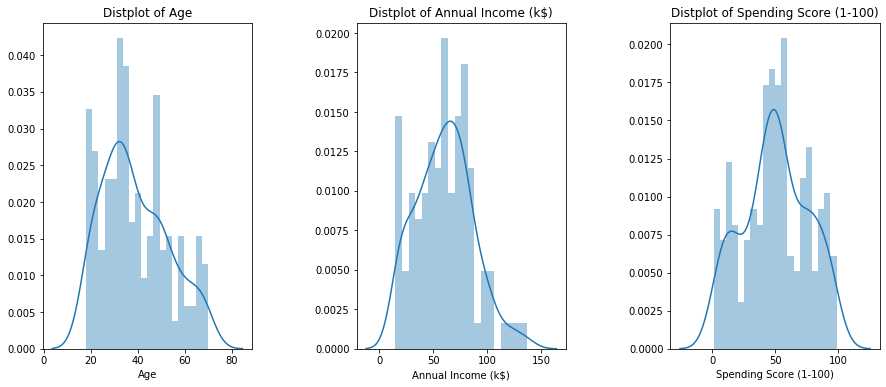

In [120]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

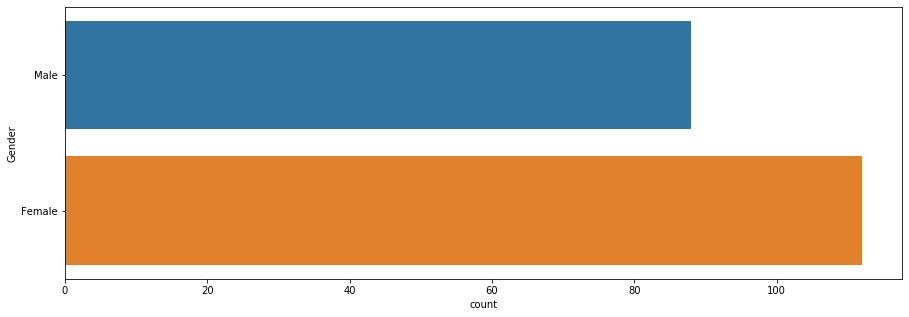

In [121]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

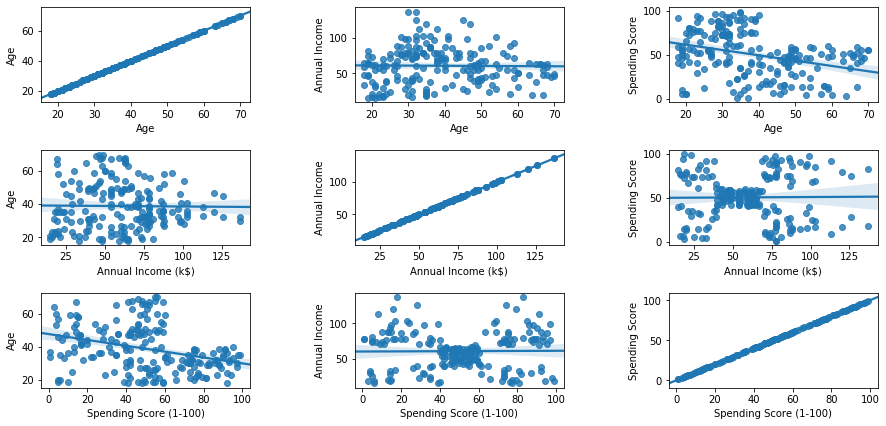

In [122]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

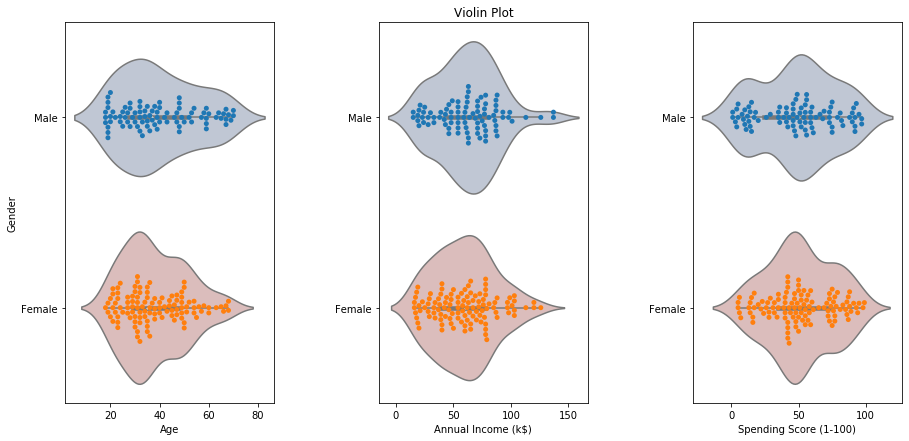

In [123]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Violin Plot' if n == 2 else '')
plt.show()

K-MEANS++ for AGE vs Spending Score

In [124]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

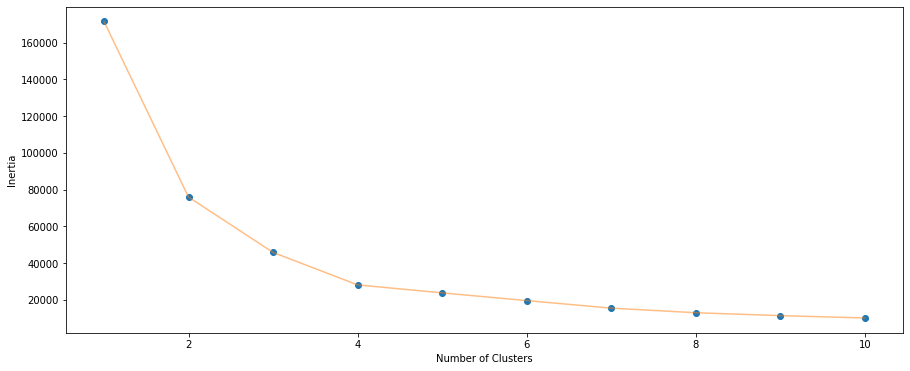

In [125]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

K-Means++ for 3 clusters

Text(0, 0.5, 'Spending Score (1-100)')

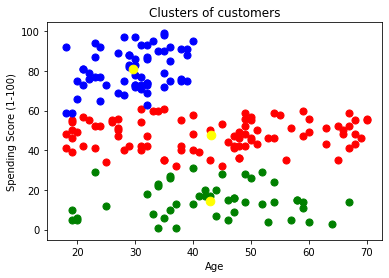

In [126]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X1)
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.xlabel('Age')

plt.ylabel('Spending Score (1-100)')

K-Means++ for 4 Clusters

Text(0, 0.5, 'Spending Score (1-100)')

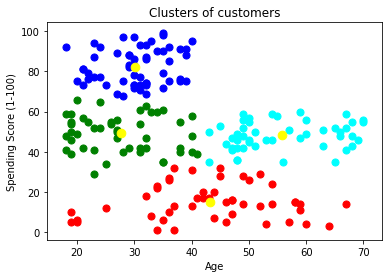

In [127]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X1)
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.xlabel('Age')

plt.ylabel('Spending Score (1-100)')

K-Means for 5 clusters

Text(0, 0.5, 'Spending Score (1-100)')

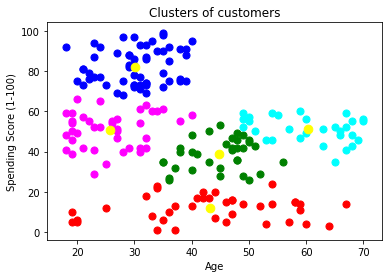

In [128]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X1)
plt.scatter(X1[y_kmeans == 0, 0], X1[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

plt.scatter(X1[y_kmeans == 1, 0], X1[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(X1[y_kmeans == 2, 0], X1[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(X1[y_kmeans == 3, 0], X1[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

plt.scatter(X1[y_kmeans == 4, 0], X1[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.xlabel('Age')

plt.ylabel('Spending Score (1-100)')


CONCLUSION:
(For Age vs Spending Score)

So from Above 3 graphs,
the graph with 4 clusters gives better results.

BLUE cluster = Young and high spending score
GREEN cluster = Young and medium spending score
CYAN cluster = old and medium spending score
RED cluster = Mixed age group and low spending score

Annual Income vs Spending Score


In [129]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

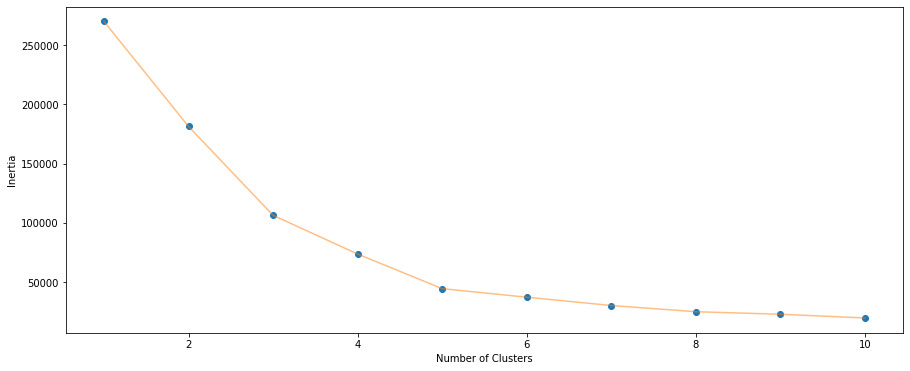

In [130]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

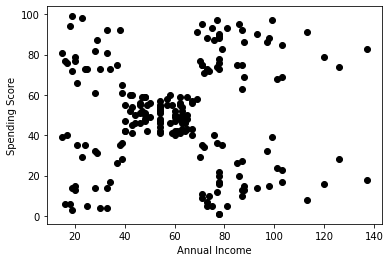

In [134]:
X = df[["Annual Income (k$)","Spending Score (1-100)"]]
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
#Visualise data points
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

RANDOMLY INTIALIZED CENTROIDS (KNN)

In [135]:
def random(ds, k, random_state=42):
    np.random.seed(random_state)
    centroids = []
    m = np.shape(ds)[0]

    for _ in range(k):
        r = np.random.randint(0, m-1)
        centroids.append(ds[r])

    return np.array(centroids)

[[62 59]
 [93 90]
 [60 49]
 [20 13]]


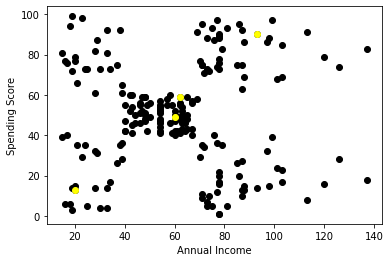

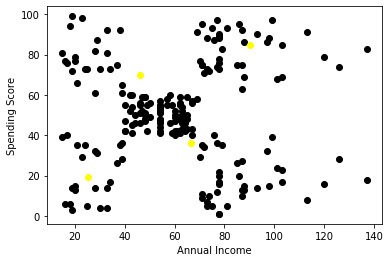

-9.359001425943912


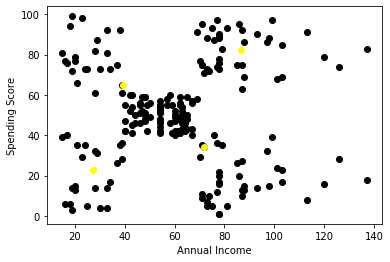

-1.856409194496912


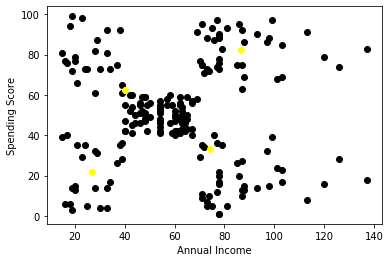

-1.3489108551850038


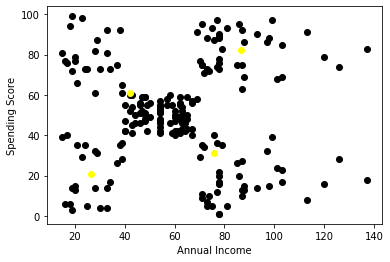

0.34737407124897857


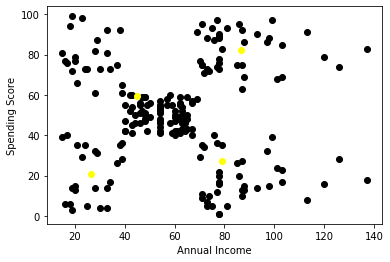

-0.07288938233320863


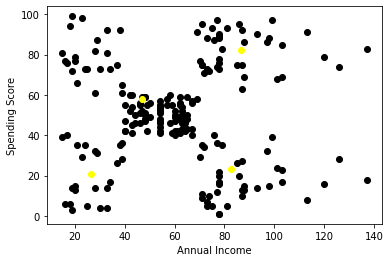

0.13833920216899642


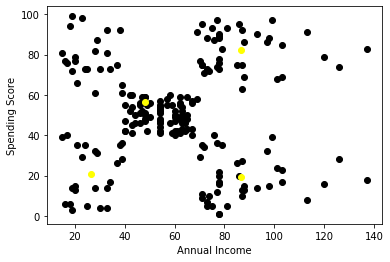

-0.012259436469967966


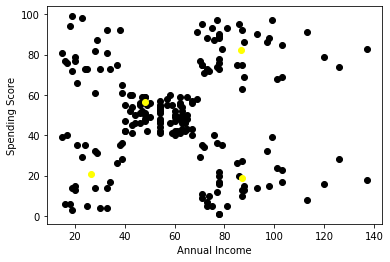

0.0


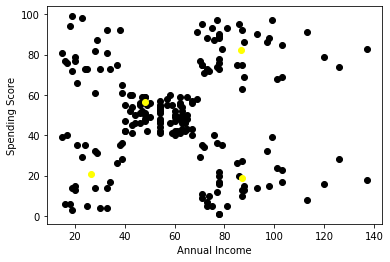

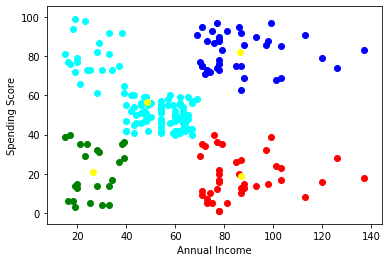

In [154]:
K=4
rand = random(X2,4,random_state =42 )
Y1 = pd.DataFrame(rand, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(rand)
Centroids = (Y1.sample(n=K))
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
            d2=(row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum() + (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
    plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()


color=['blue','green','cyan','red']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
   

plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


[[62 59]
 [93 90]
 [60 49]
 [20 13]
 [63 50]]


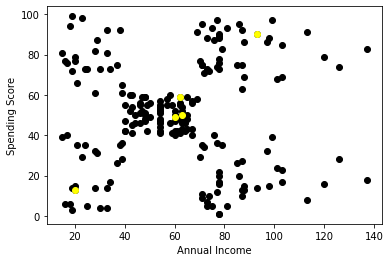

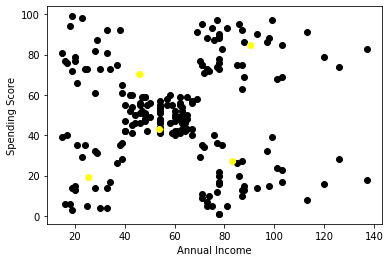

-15.564239309475642


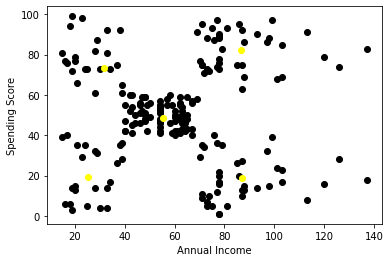

1.5525778077557888


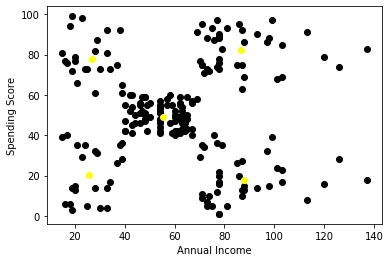

1.8805347947065059


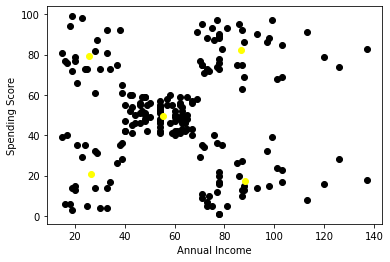

0.0


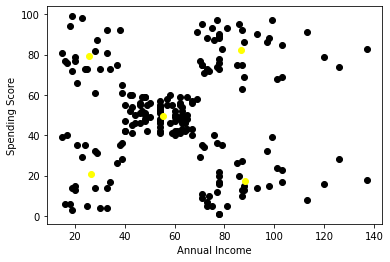

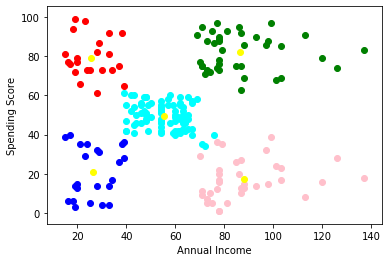

In [171]:
K=5
rand = random(X2,5, random_state =42)
Y1 = pd.DataFrame(rand, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(rand)
Centroids = (Y1.sample(n=K))
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
            d2=(row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum() + (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
    plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()


color=['blue','green','cyan','red','pink']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
   

plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

[[62 59]
 [93 90]
 [60 49]
 [20 13]
 [63 50]
 [49 42]]


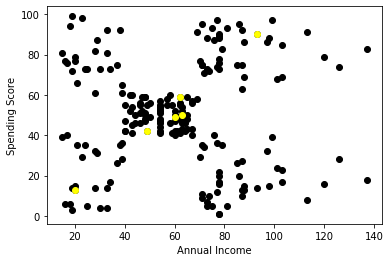

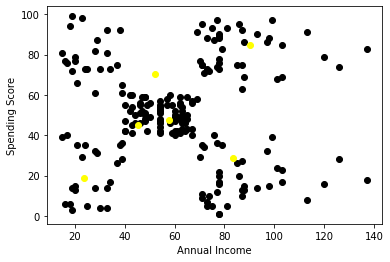

-12.582663571255601


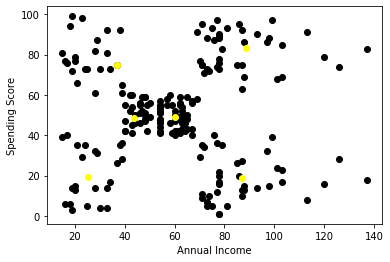

-7.442063672727105


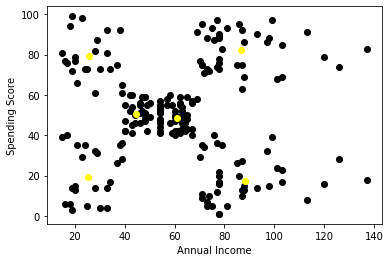

0.16272223147223386


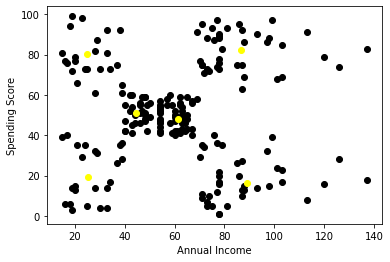

0.44522862270504504


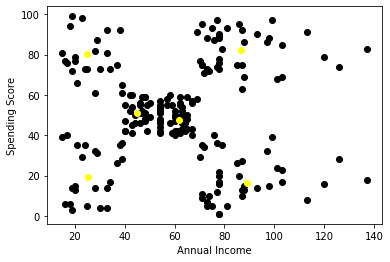

0.7603249876279818


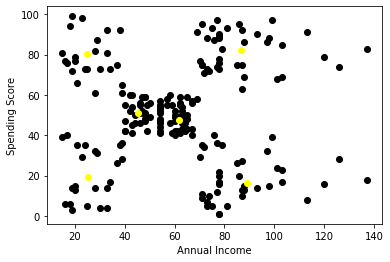

0.47564429211488246


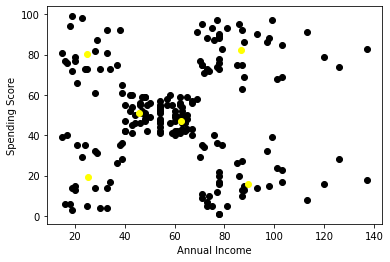

0.30287630272592025


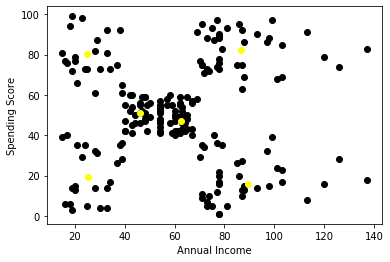

0.28157102922141064


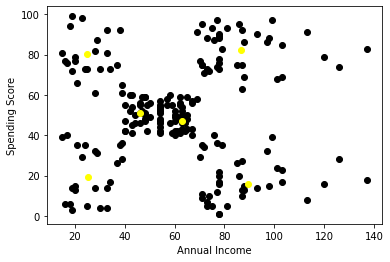

0.27852564102563804


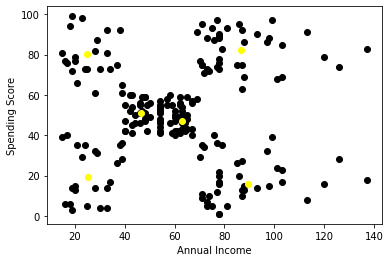

0.0


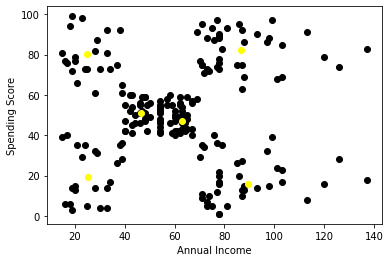

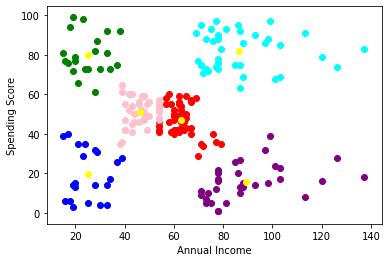

In [156]:
K=6

rand = random(X2,6,random_state =42 )
print(rand)
Y1 = pd.DataFrame(rand, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

Centroids = (Y1.sample(n=K))
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
            d2=(row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum() + (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
    plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()


color=['blue','green','cyan','red','pink','purple']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
   

plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

CENROIDS INITIALIZATION USING KNN++

Text(0, 0.5, 'Spending Score (1-100)')

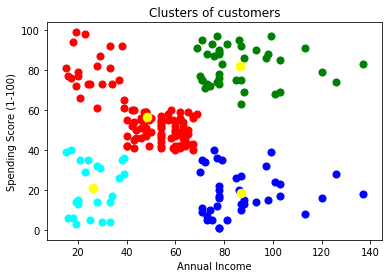

In [232]:

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X2)
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

plt.scatter(X2[y_kmeans == 4, 0], X2[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.xlabel('Annual Income')

plt.ylabel('Spending Score (1-100)')

In [214]:
from math import sqrt, floor
def plus(ds, k, random_state=42):

    np.random.seed(random_state)
    centroids = [ds[0]]

    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x,c-x) for c in centroids]) for x in ds])
        probs = dist_sq/dist_sq.sum()
        cumulative_probs = probs.cumsum()
        r = np.random.rand()
        
        for j, p in enumerate(cumulative_probs):
            if r < p:
                i = j
                break
        
        centroids.append(ds[i])

    return np.array(centroids)

[[ 15  39]
 [ 74  10]
 [126  28]
 [ 78  78]]


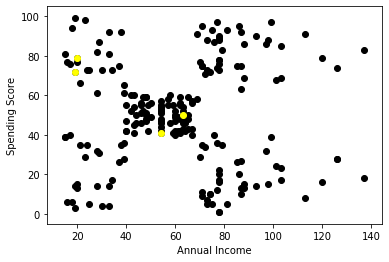

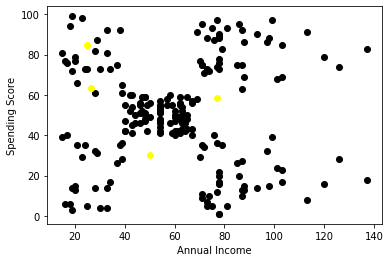

14.512353938658059


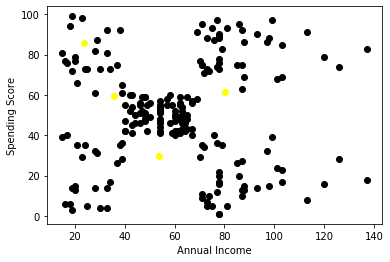

10.869722170383696


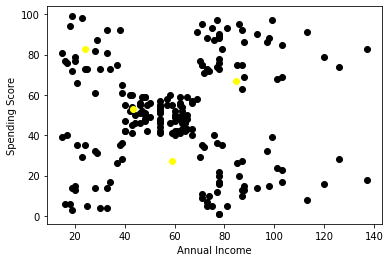

12.465434776060953


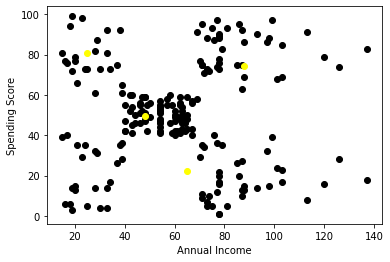

6.168010236076935


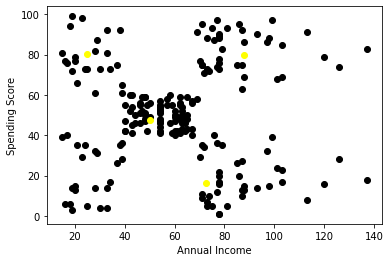

8.176485671147976


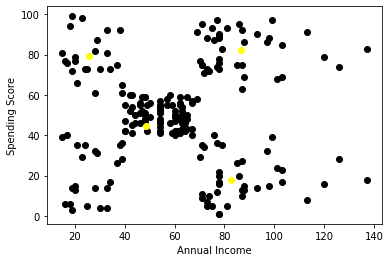

3.4933470305978496


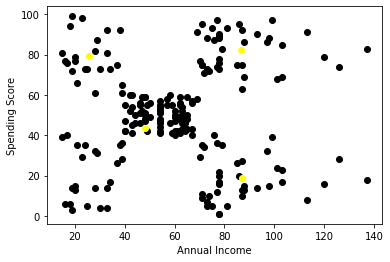

0.0


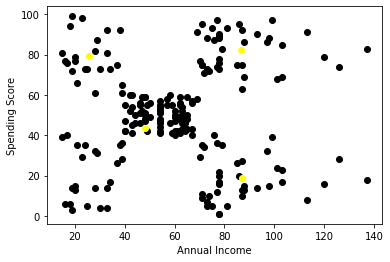

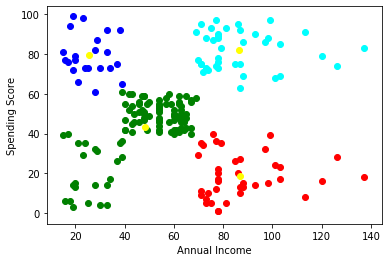

In [219]:
K=4
knnPLUS = plus(X2,4,random_state = 42)
Y2 = pd.DataFrame(knnPLUS, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
print(knnPLUS)
plt.scatter(Y2["Annual Income (k$)"],Y2["Spending Score (1-100)"],c='black')
Centroids=(X.sample(n=K))
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
            d2=(row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum() + (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
    plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()


color=['blue','green','cyan','red']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
   

plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Text(0, 0.5, 'Spending Score (1-100)')

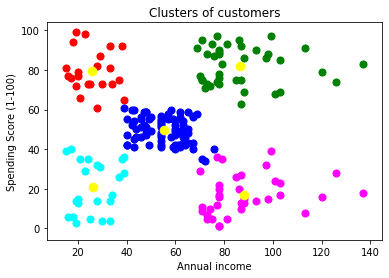

In [233]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X2)
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

plt.scatter(X2[y_kmeans == 4, 0], X2[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.xlabel('Annual income')

plt.ylabel('Spending Score (1-100)')

[array([137,  18], dtype=int64), array([19, 99], dtype=int64), array([33,  4], dtype=int64), array([99, 97], dtype=int64), array([59, 55], dtype=int64)]


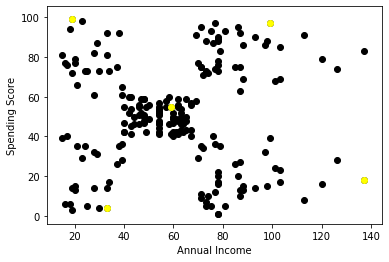

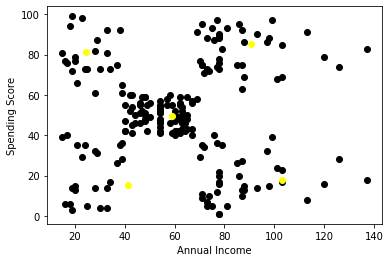

-31.765572836727678


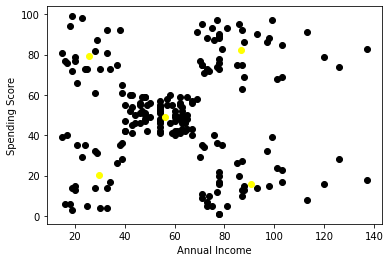

-4.011087209008737


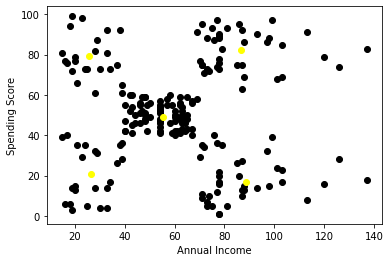

-0.1148019099238553


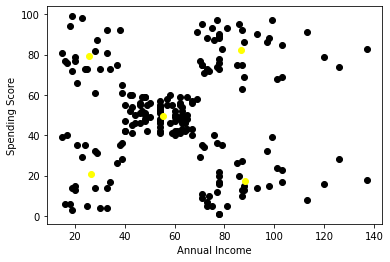

0.0


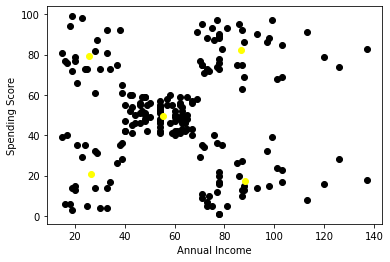

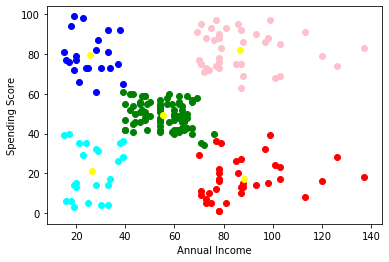

In [202]:
K=5
knnPLUS = plus(X2,5)
print(knnPLUS)
Y2 = pd.DataFrame(knnPLUS, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

Centroids=(Y2.sample(n=K))
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
            d2=(row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum() + (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
    plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()


color=['blue','green','cyan','red','pink']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
   

plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


Text(0, 0.5, 'Spending Score (1-100)')

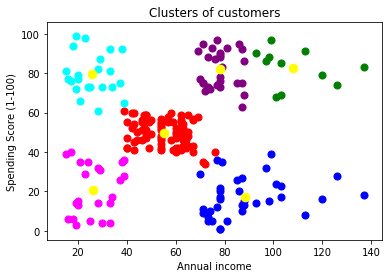

In [229]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)

y_kmeans = kmeans.fit_predict(X2)
plt.scatter(X2[y_kmeans == 0, 0], X2[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')

plt.scatter(X2[y_kmeans == 1, 0], X2[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')

plt.scatter(X2[y_kmeans == 2, 0], X2[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')

plt.scatter(X2[y_kmeans == 3, 0], X2[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')

plt.scatter(X2[y_kmeans == 4, 0], X2[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(X2[y_kmeans == 5, 0], X2[y_kmeans == 5, 1], s = 50, c = 'purple', label = 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 75, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')

plt.xlabel('Annual income')

plt.ylabel('Spending Score (1-100)')

[array([103,  23], dtype=int64), array([19, 99], dtype=int64), array([16,  6], dtype=int64), array([99, 97], dtype=int64), array([54, 53], dtype=int64), array([137,  83], dtype=int64)]


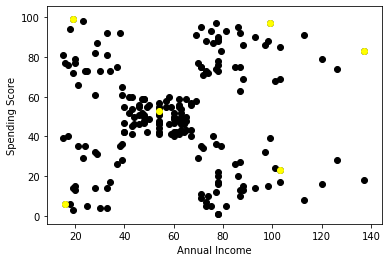

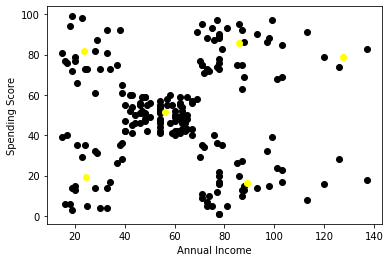

-7.272487741628787


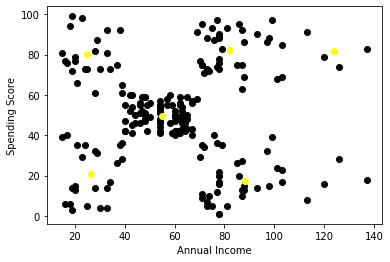

-7.014700361543987


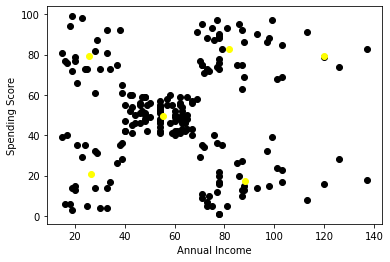

-6.750525210084035


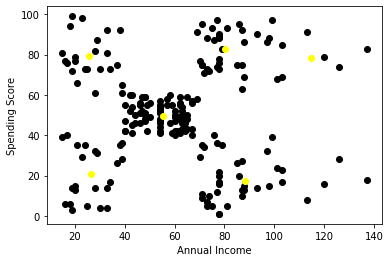

0.0


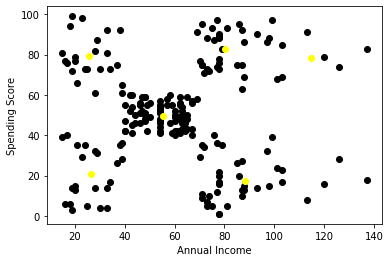

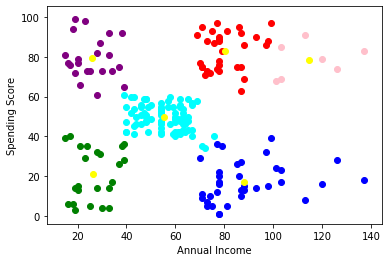

In [205]:
K=6
knnPLUS = plus(X2,6)
print(knnPLUS)
Y2 = pd.DataFrame(knnPLUS, columns=['Annual Income (k$)', 'Spending Score (1-100)'])

Centroids=(Y2.sample(n=K))
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Annual Income (k$)"]-row_d["Annual Income (k$)"])**2
            d2=(row_c["Spending Score (1-100)"]-row_d["Spending Score (1-100)"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Spending Score (1-100)'] - Centroids['Spending Score (1-100)']).sum() + (Centroids_new['Annual Income (k$)'] - Centroids['Annual Income (k$)']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Spending Score (1-100)","Annual Income (k$)"]]
    plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='black')
    plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()


color=['blue','green','cyan','red','pink','purple']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=color[k])
   

plt.scatter(Centroids["Annual Income (k$)"],Centroids["Spending Score (1-100)"],c='yellow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()
